In [24]:
import pandas as pd
import numpy as np
df = pd.read_csv('processed_travel_destinations.csv')

## **Exploratory Data Analysis (EDA)**

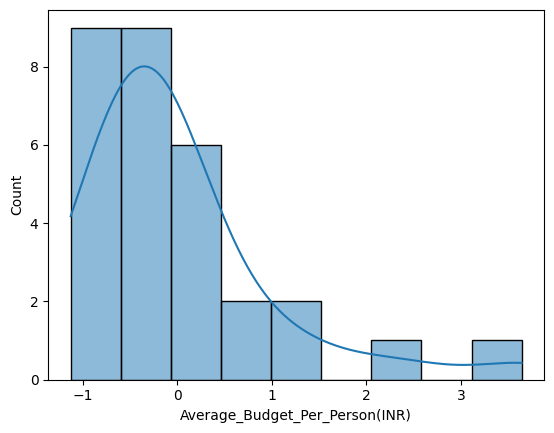

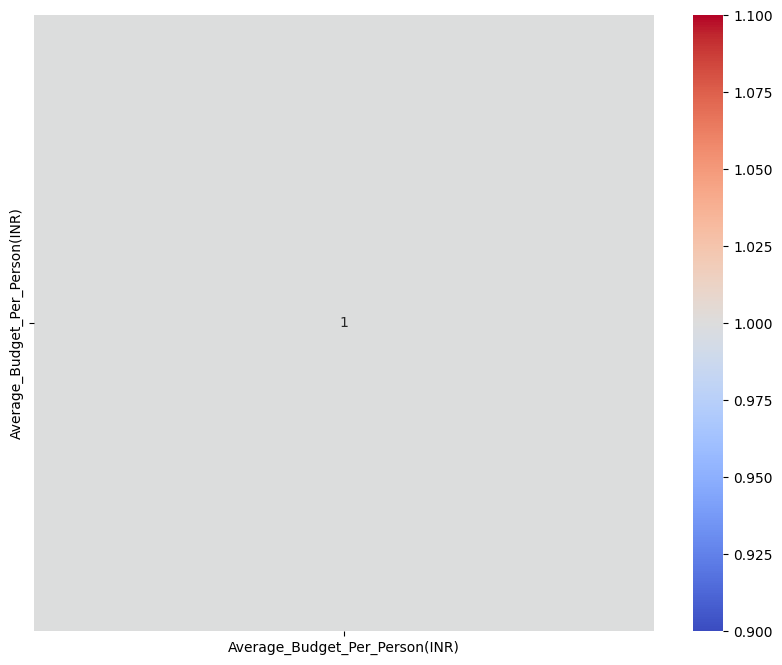

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

numerical_df = df.select_dtypes(include=['number'])

sns.histplot(df['Average_Budget_Per_Person(INR)'], kde=True)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.show()

## **NLP INTENT DETECTION**

In [26]:
import re

def detect_intent(user_input):
    if re.search(r"recommend|suggest", user_input, re.IGNORECASE):
        return "recommend"
    elif re.search(r"budget|cheap", user_input, re.IGNORECASE):
        return "budget"
    elif re.search(r"summer|winter|season", user_input, re.IGNORECASE):
        return "season"
    else:
        return "general"



## **Response Generation**

In [27]:
def recommend_destinations(user_preferences):
    return "Here are some destinations based on your preferences!"

def predict_budget():
    return "Your estimated budget is around $1000."

## **Chat-Bot Main Logic**

In [29]:
def chatbot_response(user_input):
    intent = detect_intent(user_input)
    if intent == "recommend":
        return recommend_destinations(user_preferences)
    elif intent == "budget":
        return predict_budget()
    elif intent == "season":
        return "Could you please specify your travel season?"
    else:
        return "I'm here to help with travel recommendations!"

## **Testing and Refining**

In [30]:
def chatbot_response(user_input):
    intent = detect_intent(user_input)

# **EDA**

# **step1: Visualize data**

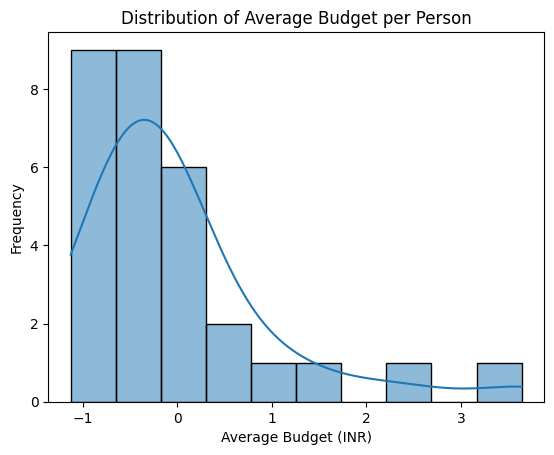

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Average_Budget_Per_Person(INR)'], bins=10, kde=True)
plt.title('Distribution of Average Budget per Person')
plt.xlabel('Average Budget (INR)')
plt.ylabel('Frequency')
plt.show()

# **step2: Analyze Co-relations**

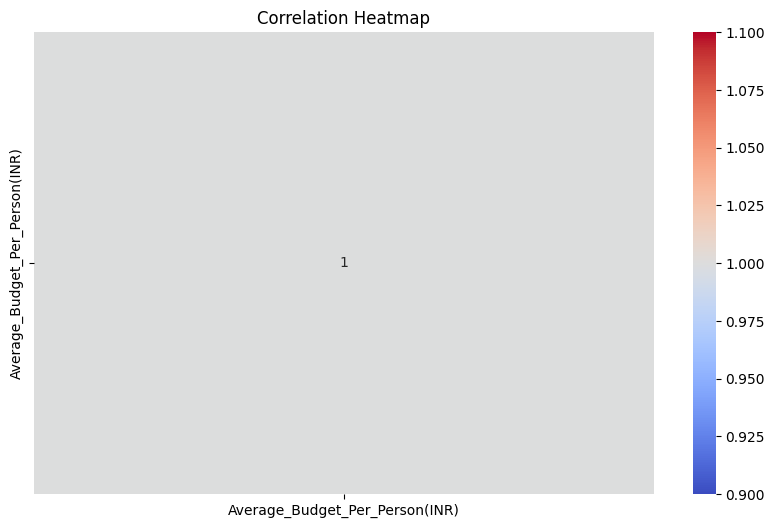

In [32]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Implement KNN for Recommendations**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score



**Prepare the data**

In [34]:
print(df.columns.tolist())
print(df.head())

X = df[['Average_Budget_Per_Person(INR)', 'Best_Time_to_Visit']]

y = df[['Type_Beach', 'Type_Adventure', 'Type_Historical',
         'Type_City', 'Type_Hill Station', 'Type_Island',
         'Type_Nature', 'Type_Romantic', 'Type_Wildlife']]

X = pd.get_dummies(X, columns=['Best_Time_to_Visit'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")





['Destination', 'Best_Time_to_Visit', 'Popular_Attractions', 'Average_Budget_Per_Person(INR)', 'Description', 'State_Andaman and Nicobar Islands', 'State_Delhi', 'State_Goa', 'State_Himachal Pradesh', 'State_Jammu and Kashmir', 'State_Karnataka', 'State_Kerala', 'State_Ladakh', 'State_Maharashtra', 'State_Meghalaya', 'State_Punjab', 'State_Rajasthan', 'State_Tamil Nadu', 'State_Telangana', 'State_Uttar Pradesh', 'State_Uttarakhand', 'State_West Bengal', 'Type_Adventure', 'Type_Beach', 'Type_City', 'Type_Cultural', 'Type_Hill Station', 'Type_Historical', 'Type_Island', 'Type_Nature', 'Type_Romantic', 'Type_Wildlife']
  Destination    Best_Time_to_Visit         Popular_Attractions  \
0        Agra      October to March        Taj Mahal, Agra Fort   
1      Jaipur  November to February       Hawa Mahal, Amer Fort   
2         Goa  November to February          Beaches, Nightlife   
3         Leh      May to September  Pangong Lake, Nubra Valley   
4     Udaipur    September to March   Lak

**Train KNN model**

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

**Make Predictions**

In [36]:
predictions = knn.predict(X_test)

print(predictions)


[[False False  True False False False False False False]
 [False False False False False False False False False]
 [False False  True False False False False False False]
 [False False False False False False False False False]
 [False False  True False False False False False False]
 [False False False False False False False False False]]


**Evaluate the Model**

In [37]:
accuracy = accuracy_score(y_test, predictions)
print(f'KNN Model Accuracy: {accuracy:.2f}')



KNN Model Accuracy: 0.17


## **Implement Simple Linear Regression for Budget Prediction**



In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


**Prepare Data for Linear Regression**

In [39]:
X_budget = df[['Type_Beach', 'Type_Adventure', 'Type_Historical',
             'Type_City', 'Type_Hill Station', 'Type_Island',
             'Type_Nature', 'Type_Romantic', 'Type_Wildlife']]
y_budget = df['Average_Budget_Per_Person(INR)']

X_budget_train, X_budget_test, y_budget_train, y_budget_test = train_test_split(X_budget, y_budget, test_size=0.2, random_state=42)

**Train the Linear Regression Model**

In [40]:
lin_reg = LinearRegression()

lin_reg.fit(X_budget_train, y_budget_train)


LinearRegression()

**Make Predictions**

In [41]:
budget_predictions = lin_reg.predict(X_budget_test)

print(budget_predictions)


[-0.04334192 -0.69347076 -0.69347076 -0.69347076  3.64072147  0.06501288]


**Evaluate The Model**

In [42]:
   mse = mean_squared_error(y_budget_test, budget_predictions)
   r2 = r2_score(y_budget_test, budget_predictions)

   print(f'Mean Squared Error: {mse:.2f}')
   print(f'R² Score: {r2:.2f}')


Mean Squared Error: 5.07
R² Score: -2.71


## ** Recommendation Code**

In [43]:
import calendar
import pandas as pd

df = pd.read_csv('processed_travel_destinations.csv')

def get_month_number(month_name):
    try:
        month_name = month_name.strip().title()
        return list(calendar.month_name).index(month_name)
    except ValueError:
        print(f"Invalid month: '{month_name}' not recognized.")
        return None

def is_month_in_range(preferred_month, range_str):
    months = range_str.split(" to ")
    start_month = get_month_number(months[0])
    end_month = get_month_number(months[1]) if len(months) > 1 else start_month

    if start_month and end_month:
        if start_month <= end_month:
            return start_month <= preferred_month <= end_month
        else:
            return preferred_month >= start_month or preferred_month <= end_month
    return False

def recommend_destinations(min_budget, max_budget, time_to_visit, interest):

    budget_filtered = df[
        (df['Average_Budget_Per_Person(INR)'] >= min_budget) &
        (df['Average_Budget_Per_Person(INR)'] <= max_budget)
    ]

    preferred_month = get_month_number(time_to_visit.split()[0])
    time_filtered = budget_filtered[budget_filtered['Best_Time_to_Visit'].apply(lambda x: is_month_in_range(preferred_month, x))]

    interest_column = f"Type_{interest}"
    if interest_column in df.columns:
        recommendations = time_filtered[time_filtered[interest_column] == True]
    else:
        recommendations = time_filtered

    if recommendations.empty:
        return "No recommendations found."
    else:
        return recommendations[['Destination', 'Description', 'Average_Budget_Per_Person(INR)', 'Best_Time_to_Visit']]

min_budget = float(input("Enter minimum budget (lower boundary of the range): "))
max_budget = float(input("Enter maximum budget (upper boundary of the range): "))
time_to_visit = input("Enter preferred time to visit (e.g., 'November to February'): ")
interest = input("Enter interest type (e.g., 'Beach'): ")

recommendations = recommend_destinations(min_budget, max_budget, time_to_visit, interest)
print(recommendations)

Enter minimum budget (lower boundary of the range): -1
Enter maximum budget (upper boundary of the range): 4
Enter preferred time to visit (e.g., 'November to February'): November to February
Enter interest type (e.g., 'Beach'): Beach
    Destination                                        Description  \
2           Goa  goa offers beautiful beaches vibrant nightlife...   
19  Pondicherry  pondicherry coastal town french colonial archi...   

    Average_Budget_Per_Person(INR)    Best_Time_to_Visit  
2                         0.173368  November to February  
19                       -0.693471      October to March  
